<a href="https://colab.research.google.com/github/lucas-azdias/Scripts-Universidade/blob/main/Python/Aprendizagem%20de%20M%C3%A1quina/02/Modelo%20KNN/Modelo%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial KNN

Neste tutorial, iniciaremos nossas práticas de aprendizado de máquina utilizando a biblioteca scikit-learn, que é uma das principais ferramentas de aprendizado de máquina em Python.

Dentre os algoritmos de classificação disponíveis nesta biblioteca, vamos começar com o KNN, que significa "K-Nearest Neighbors" ou "K-Vizinhos Mais Próximos". Esse algoritmo é um dos mais simples e populares da área de aprendizado de máquina.

O KNN é um método não-paramétrico de classificação, ou seja, ele não assume nada sobre a distribuição dos dados. O funcionamento do algoritmo se baseia na ideia de que amostras semelhantes tendem a estar próximas umas das outras no espaço de atributos.

Dado um conjunto de dados de treinamento com amostras já classificadas, o KNN determina a classe de uma amostra de teste a partir dos K vizinhos mais próximos a ela no espaço de atributos. A classe da amostra de teste é determinada por voto majoritário entre as classes dos seus K vizinhos mais próximos.

Abaixo ilustra-se o KNN:

> > > > > 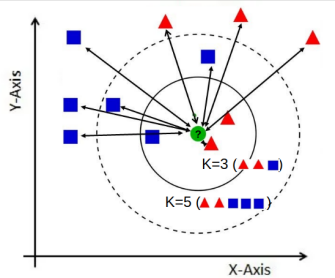

#Dataset sintético

  Utilizamos a função make_blobs() para criar uma distribuição de dados que será usada para avaliar o desempenho do KNN. Essa função permite criar conjuntos de dados artificiais com uma determinada quantidade de centroídes e diferentes desvios-padrão.

No entanto, mais adiante no tutorial, produziremos distribuições de dados mais complexas, que permitirão avaliar o desempenho do KNN em situações mais desafiadoras. Dessa forma, poderemos entender melhor as limitações e os pontos fortes do algoritmo, bem como explorar diferentes técnicas para melhorar sua eficiência.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

random_seed=9999

#centro de massa da distribuição
centers = [[1, 2], [7, 5], [3, 12]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)

for sample, label in zip(data[:10],labels[:10]):
  print(sample, label)


[1.88251299 0.21776835] 0
[-0.14158407  0.56091061] 0
[8.23809819 5.45613494] 1
[ 2.38615696 12.5106381 ] 2
[ 3.37055279 12.60774395] 2
[ 3.17995786 11.41664478] 2
[ 4.38621013 12.4870083 ] 2
[-0.19880191  4.93170517] 0
[1.11984837 2.18259889] 0
[7.23151031 4.51579089] 1


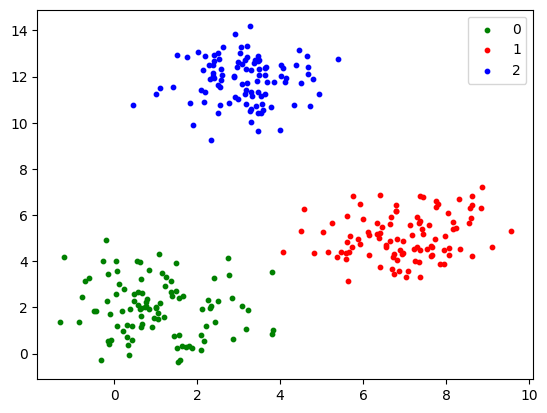

In [2]:
#Exibição
colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

#Preparação dos dados

Uma etapa crucial no aprendizado de máquina é a preparação dos dados. Esta etapa inclui normalmente:


*   Análise Exploratória
*   Normalização
*   Método de Validação





##Holdout (Train-Val | Test)

In [3]:
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)



Avaliação Geral

In [4]:
centers = [[1, 2], [7, 5], [3, 12]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)

#Criação do modelo com seus hiper-parâmetros


*   Distância
*   K-Vizinhos




In [5]:
from sklearn.neighbors import KNeighborsClassifier


#p=1 ~ Manhattan Distance
#p=2 ~ Euclidean
#p!=1|2 ~ minkowski
knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_neighbors=5)


knn.fit(train_data,train_labels)


KNeighborsClassifier()

#Teste do modelo

(90, 2)
(90,)
[1.4819637  3.93600617] 0 0 OK
[ 1.55292892 -0.38896914] 0 0 OK
[1.15897379 3.48653291] 0 0 OK
[ 3.20706604 12.84773739] 2 2 OK
[0.05294003 4.00636123] 0 0 OK
[6.55148096 4.59802879] 1 1 OK
[6.40183658 5.24334545] 1 1 OK
[ 4.46305102 13.16799797] 2 2 OK
[7.75988608 6.34822019] 1 1 OK
[0.57580066 2.64666807] 0 0 OK
1.0


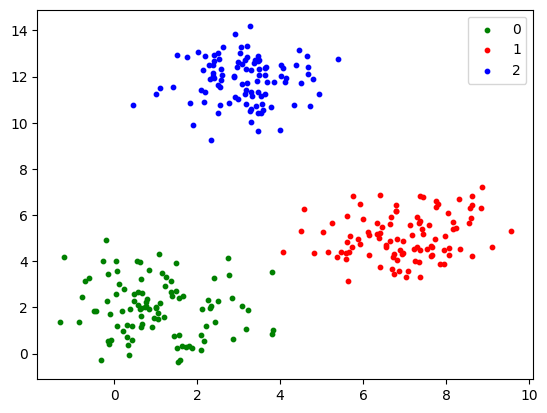

In [6]:
#computa as classes para todos
print(test_data.shape)
predicts = knn.predict(test_data)
print(predicts.shape)

for i in range(10):
  if predicts[i] == test_labels[i]:
    resp = 'OK'
  else:
    resp = 'ERROR'

  print(test_data[i],predicts[i],test_labels[i],resp)

#Exibição
colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

from sklearn.metrics import accuracy_score
acc = accuracy_score(test_labels,predicts)
print(acc)

###Metricas de Avaliação
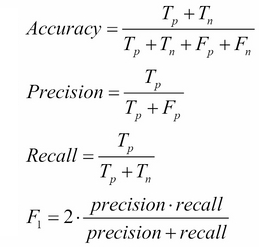

In [7]:
from sklearn.metrics import accuracy_score
example_predictions = [0, 2, 1, 3, 2, 0, 1, 2, 0]
example_labels      = [0, 2, 2, 3, 2, 1, 1, 1, 1]
acc = accuracy_score(example_labels,example_predictions)
print(f'Acc: {acc}')

Acc: 0.5555555555555556


In [8]:
from sklearn.metrics import classification_report
print(classification_report(example_labels,example_predictions))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.50      0.25      0.33         4
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         1

    accuracy                           0.56         9
   macro avg       0.62      0.73      0.62         9
weighted avg       0.59      0.56      0.54         9



#Analise Crítica
Vamos analisar o desempenho do KNN quanto:


*   Distribuição
*   K Vizinhos
*   Quantidade de amostras




(300, 2) (300,)
[1.88251299 0.21776835] 0
[-0.14158407  0.56091061] 0
[8.23809819 5.45613494] 1
[ 2.38615696 12.5106381 ] 2
[ 3.37055279 12.60774395] 2
[ 3.17995786 11.41664478] 2
[ 4.38621013 12.4870083 ] 2
[-0.19880191  4.93170517] 0
[1.11984837 2.18259889] 0
[7.23151031 4.51579089] 1


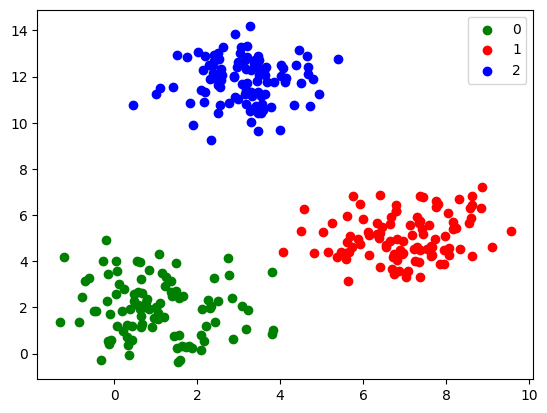


Acc: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        27

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



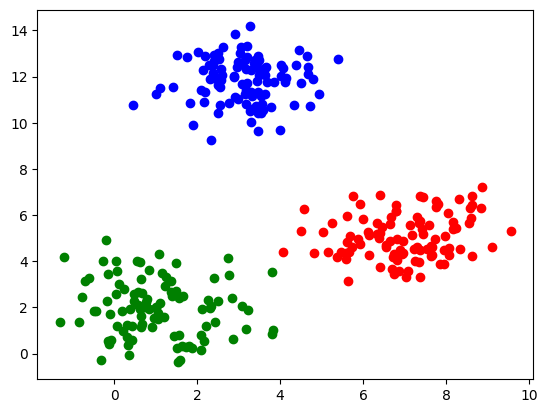

In [18]:
#centro de massa da distribuição
centers = [[1, 2], [7, 5], [3, 12]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=300, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)


print(data.shape, labels.shape)

for sample, label in zip(data[:10],labels[:10]):
  print(sample, label)




#Exibição

colours = ('green', 'red', 'blue','yellow',
           'purple','salmon','orange',
           'brown','greenyellow','gray')

n_classes = len(np.unique(labels))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], label=str(n_class))

ax.legend(loc='upper right')

plt.show()
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_neighbors=5)


knn.fit(train_data,train_labels)

predicts = knn.predict(test_data)

acc = accuracy_score(predicts, test_labels)
print(f'\nAcc: {acc}\n')

print(classification_report(test_labels,predicts))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], label=str(n_class))


# Classificação de Bases Reais

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [10]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
import pandas as pd

df = load_wine(as_frame=True).frame

df.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
df.sample(frac=1).head(15)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625.0,1
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0,0
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0,1
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1
50,13.05,1.73,2.04,12.4,92.0,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.0,0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
76,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392.0,1
97,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,1
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0,0


(569, 30) (569,)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 0


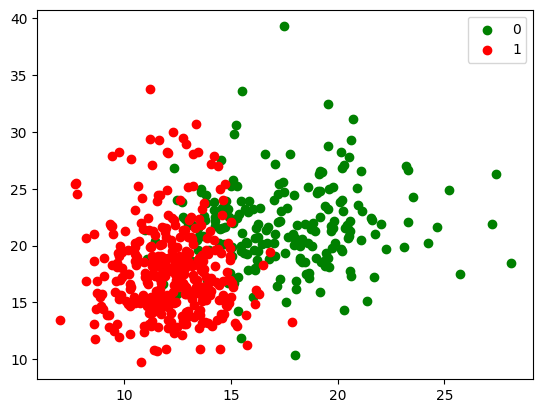

In [12]:
#Carrego a base como vetores numpy
data,labels = load_breast_cancer(return_X_y=True)
print(data.shape, labels.shape)

print(data[0],labels[0])
#Exibição

colours = ('green', 'red', 'blue','yellow',
           'purple','salmon','orange',
           'brown','greenyellow','gray')

n_classes = len(np.unique(labels))

fig, ax = plt.subplots()
for n_class in range(0, n_classes):

    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], label=str(n_class))

ax.legend(loc='upper right')

plt.show()

In [13]:
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

knn = KNeighborsClassifier(metric='minkowski',
                           p=2,
                           n_jobs=1,
                           n_neighbors=5)


knn.fit(train_data,train_labels)

predicts = knn.predict(test_data)

acc = accuracy_score(test_labels,predicts)
print(f'\nAcc: {acc}\n')

print(classification_report(test_labels,predicts ))


Acc: 0.9415204678362573

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.96      0.96      0.96       118

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

